In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [3]:
sep_coins = cv2.imread('Computer-Vision-with-Python/DATA/pennies.jpg')     

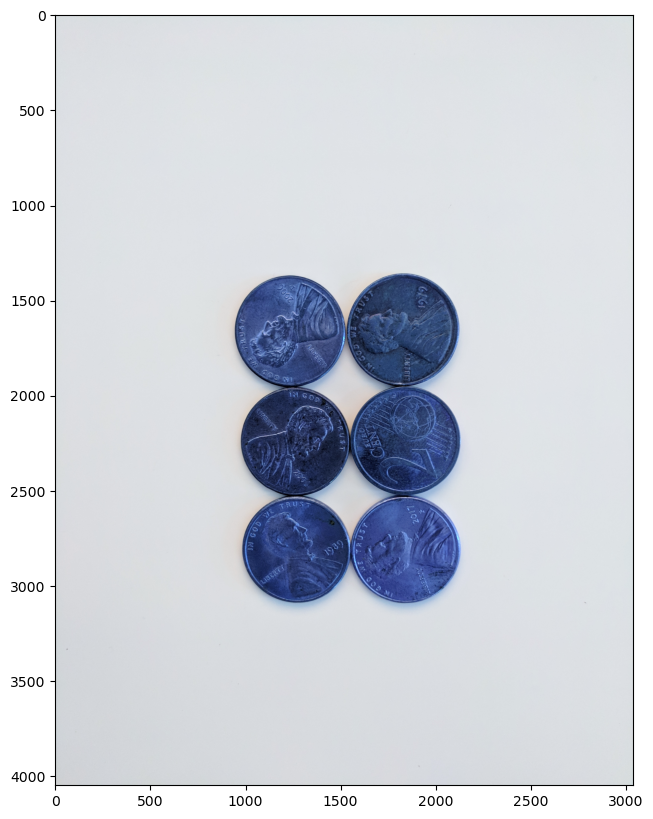

In [4]:
display(sep_coins)

In [5]:
# Median Blur
# Grayscale
# Binary Threshold
# Find Contours

In [6]:
# Median Blur
sep_blur = cv2.medianBlur(sep_coins,25)

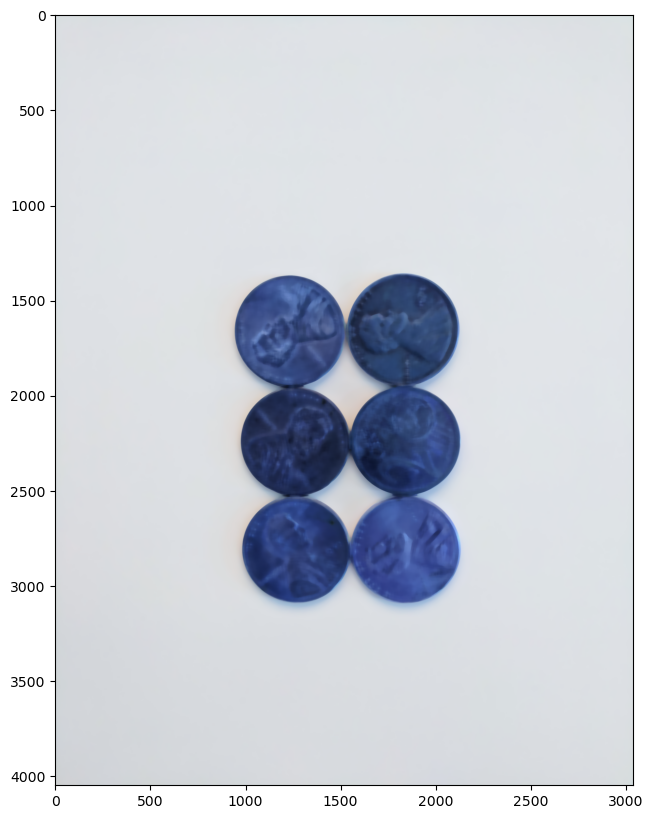

In [7]:
display(sep_blur)

In [8]:
# Grayscale
gray_sep_coins = cv2.cvtColor(sep_blur,cv2.COLOR_BGR2GRAY)

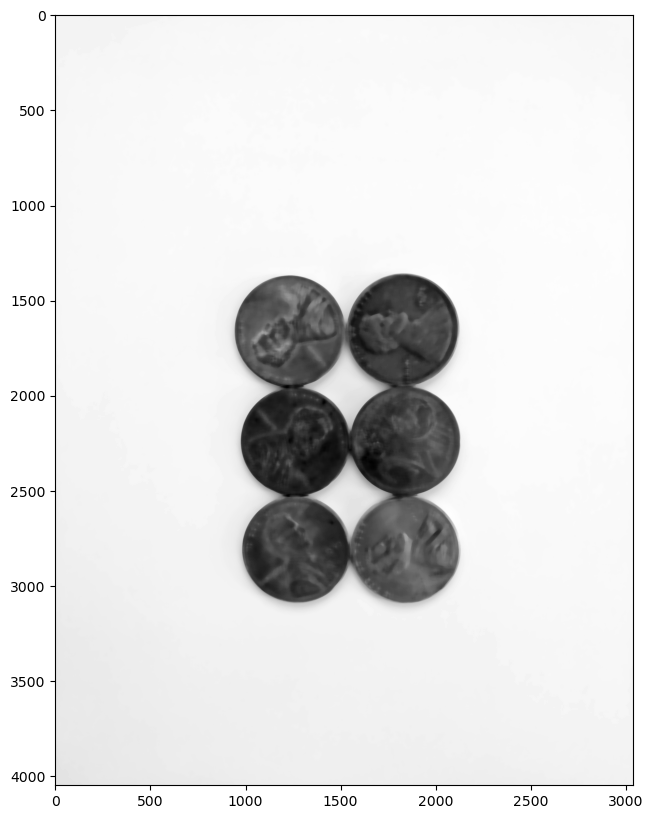

In [9]:
display(gray_sep_coins)

In [10]:
# Binary Threshold
ret, sep_thresh = cv2.threshold(gray_sep_coins,160,255,cv2.THRESH_BINARY_INV)

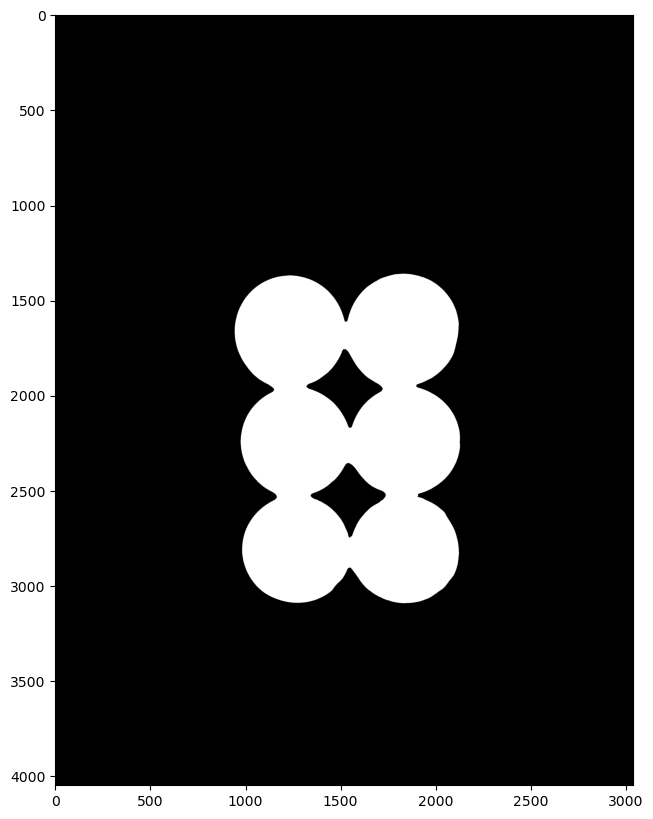

In [11]:
display(sep_thresh)

In [12]:
# Find Contours
contours,hierarchy = cv2.findContours(sep_thresh.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [13]:
for i in range(len(contours)):
        if hierarchy[0][i][3] == -1:
            cv2.drawContours(sep_coins,contours,i,(255,0,0),10)

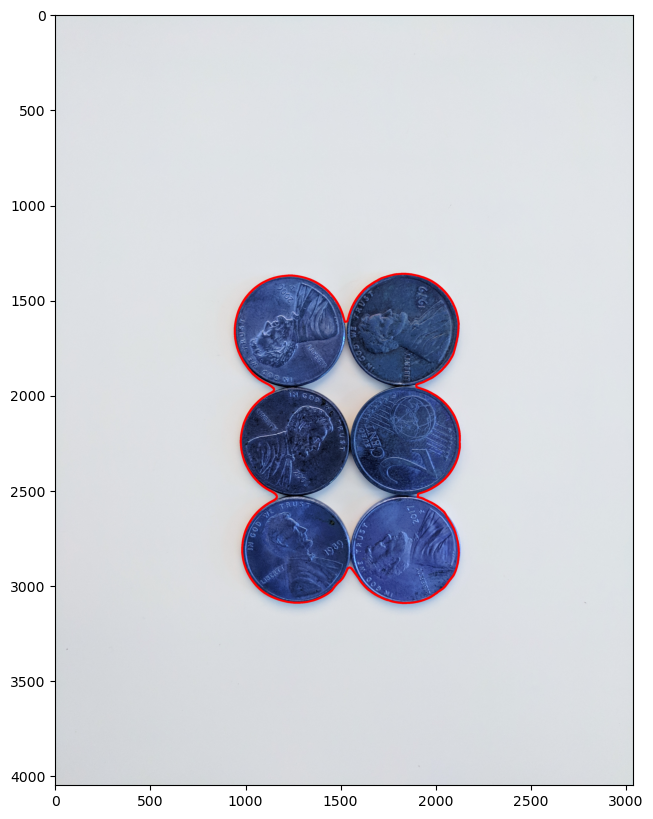

In [14]:
display(sep_coins)

In [15]:
# Watershed:
img = cv2.imread('Computer-Vision-with-Python/DATA/pennies.jpg')     

In [16]:
# Median Blur
img = cv2.medianBlur(sep_coins,35)

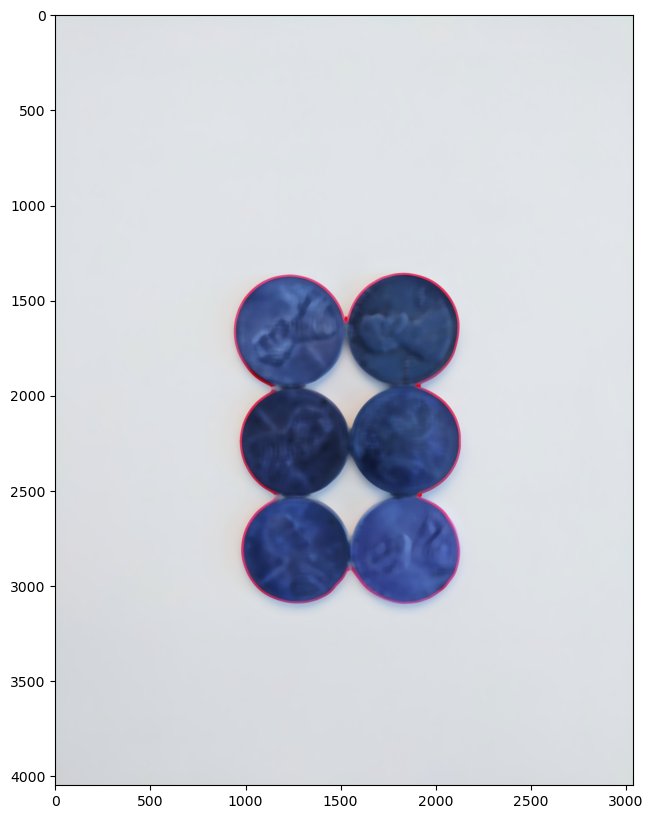

In [17]:
display(img)

In [18]:
# Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [19]:
# Binary Threshold = Otsu's Method
ret, thresh = cv2.threshold(gray_sep_coins,160,255,cv2.THRESH_BINARY_INV)# +cv2.THRESH_OTSU)

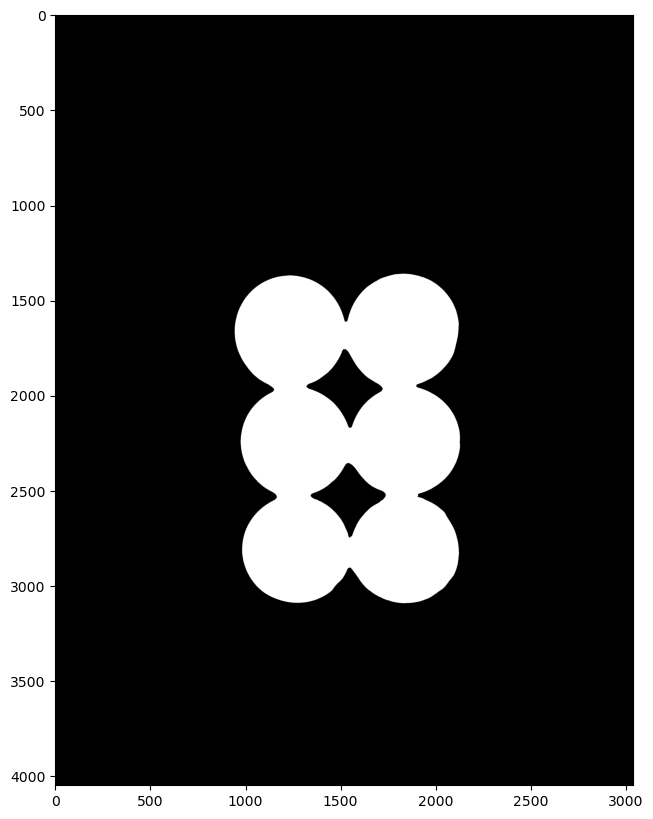

In [20]:
display(thresh)

In [21]:
# Noise Removal
kernel = np.ones((3,3),np.uint8)

In [22]:
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [23]:
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)

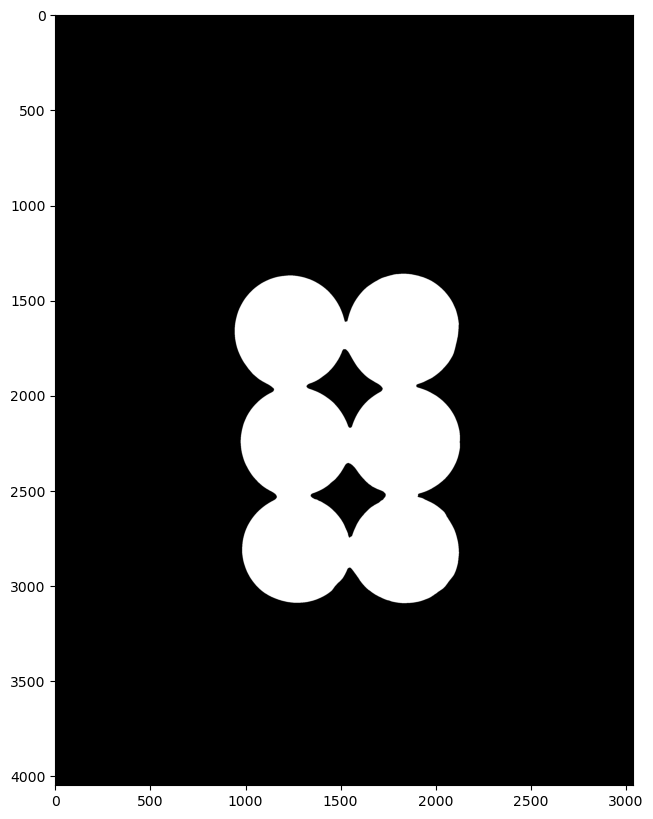

In [24]:
display(opening)

In [25]:
# Distance Transform
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L1,5)

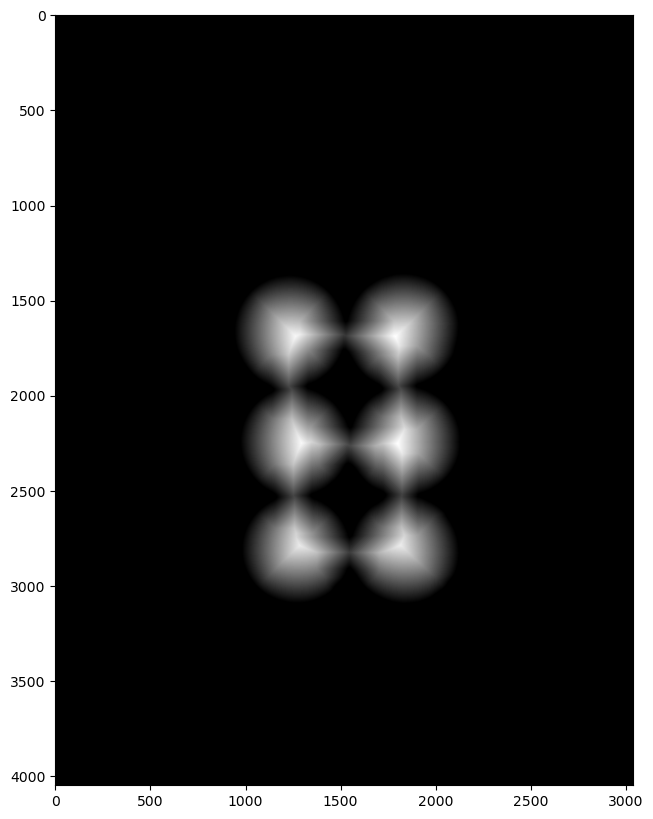

In [26]:
display(dist_transform)

In [27]:
sure_bg = cv2.dilate(opening,kernel,iterations=3)

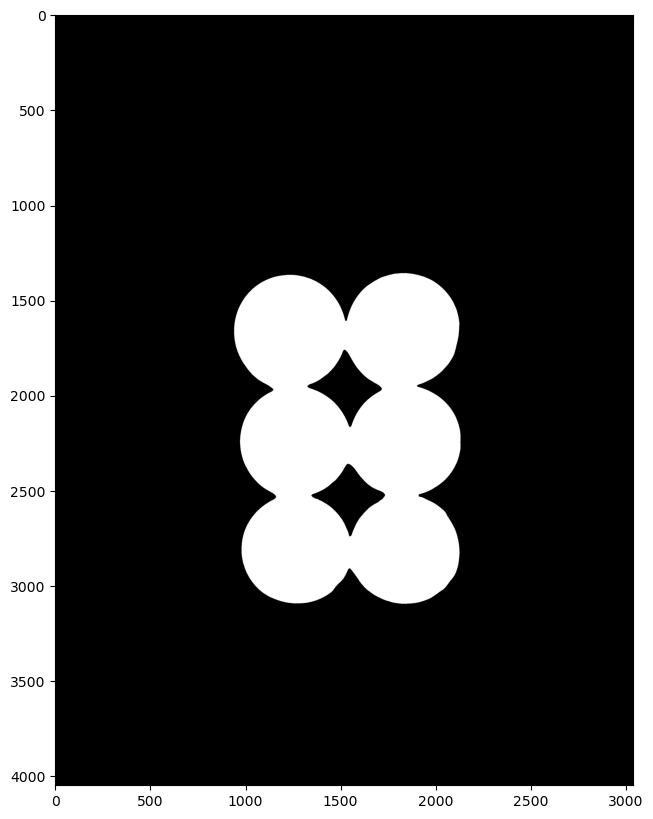

In [28]:
display(sure_bg)

In [29]:
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

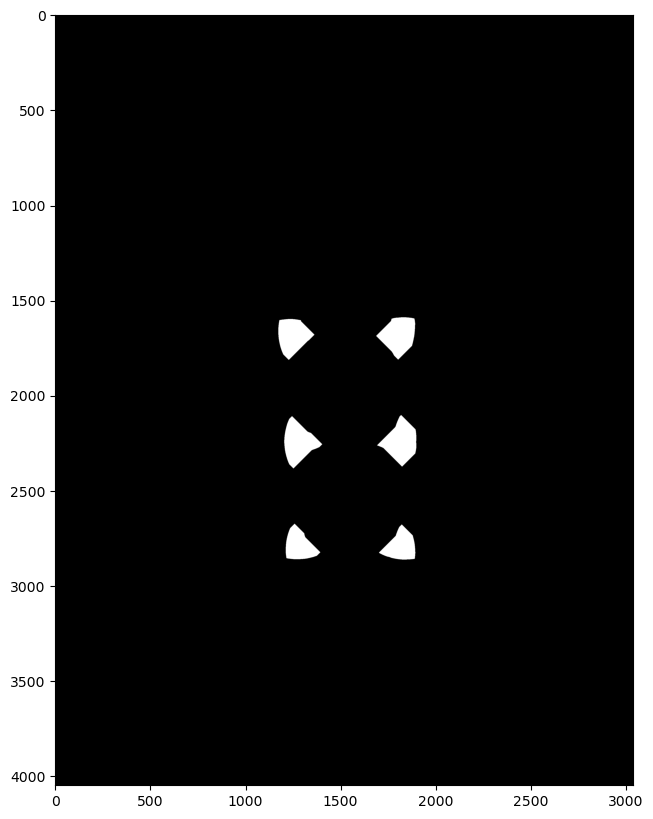

In [30]:
display(sure_fg)

In [31]:
sure_fg = np.uint8(sure_fg)

In [32]:
unknown = cv2.subtract(sure_bg,sure_fg)

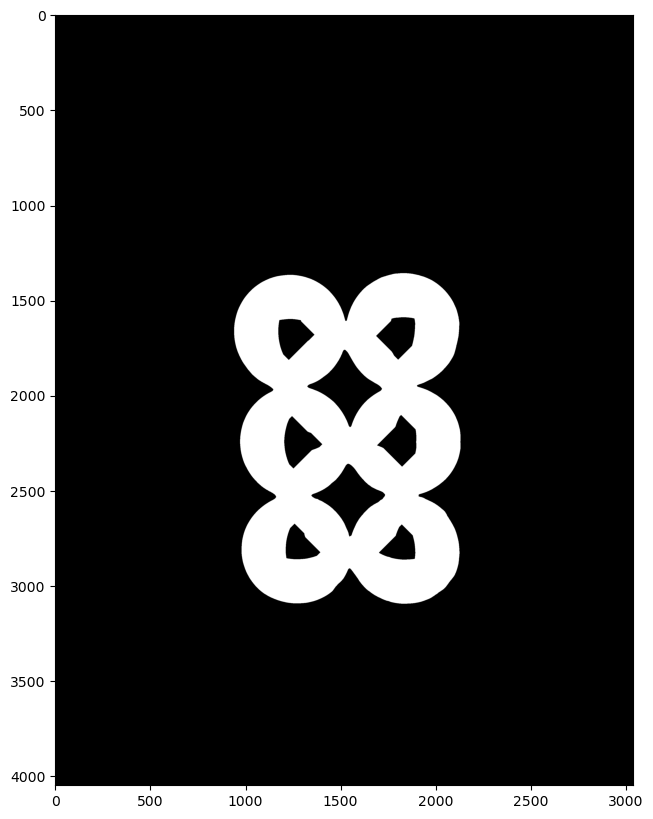

In [33]:
display(unknown)

In [34]:
ret, markers = cv2.connectedComponents(sure_fg)

In [35]:
markers = markers + 1

In [36]:
markers[unknown==255] = 0

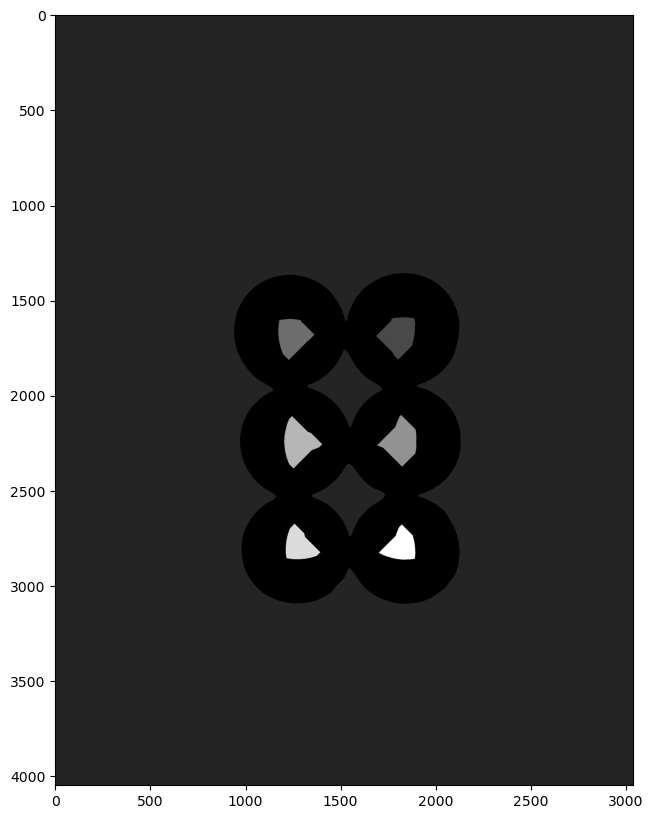

In [37]:
display(markers)

In [38]:
markers = cv2.watershed(img,markers)

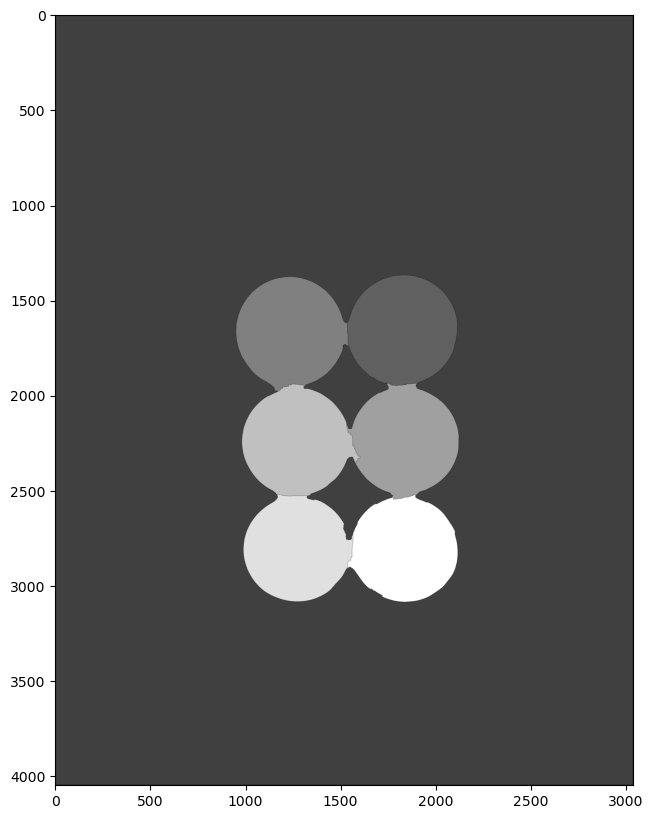

In [39]:
display(markers)

In [40]:
contours,hierarchy = cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
        if hierarchy[0][i][3] == -1:
            cv2.drawContours(sep_coins,contours,i,(255,0,0),10)

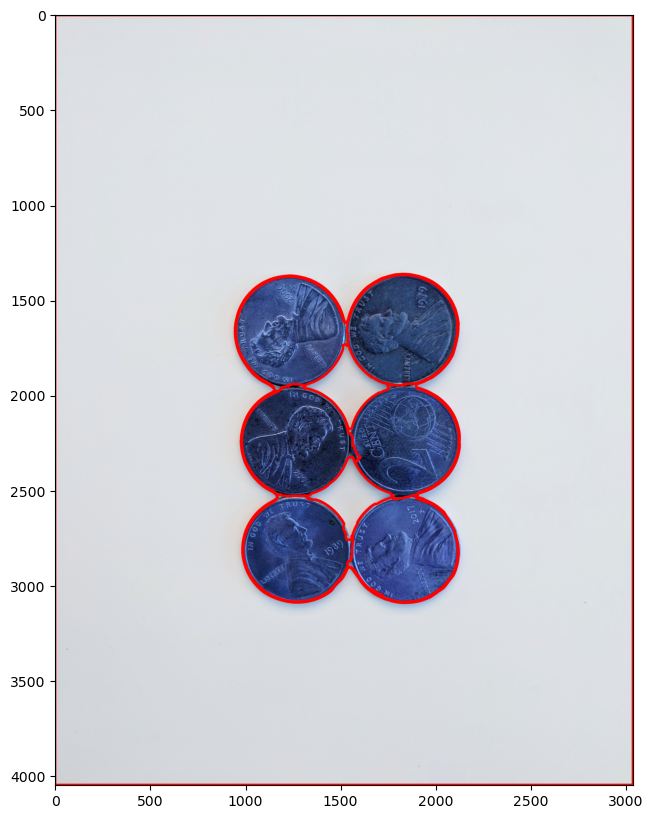

In [41]:
display(sep_coins)